In [14]:
data = pd.read_csv("AustralianCreditApproval.csv")
data["A13_8_bin"] = pd.cut(data["A13"], bins=8)
data["A13_14_bin"] = pd.cut(data["A13"], bins=14)
data["A13_q_4"] = pd.qcut(data["A13"], q=4, duplicates="drop")
data["A13_q_12"] = pd.qcut(data["A13"], q=12, duplicates="drop")


def calculate_entropy(data, col):
    label_counts = data[col].value_counts()
    probablities = label_counts / label_counts.sum()
    entropy_value = entropy(probablities, base=2)
    print(col, "entropy val: ", entropy_value)

discretization = ["A13_8_bin", "A13_14_bin", "A13_q_4", "A13_q_12"]

for dis in discretization:
    calculate_entropy(data, dis)


A13_8_bin entropy val:  2.793105949431934
A13_14_bin entropy val:  3.530786782878771
A13_q_4 entropy val:  1.9927165719599749
A13_q_12 entropy val:  3.1002822446242924


It looks like equal frequency with q=4 was the best solution to the discretization in this case.

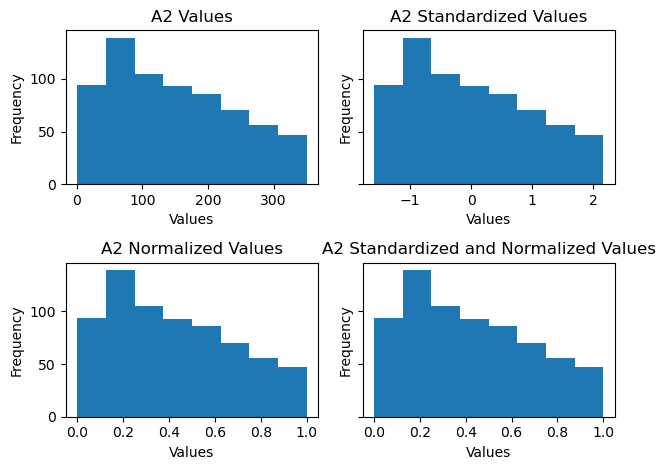

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler, MinMaxScaler


#2 -- Standardize and Normalize
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
data = pd.read_csv("AustralianCreditApproval.csv")
standardized = pd.DataFrame(
    standard_scaler.fit_transform(data), 
    columns=data.columns
)
normalized = pd.DataFrame(
    minmax_scaler.fit_transform(data), 
    columns=data.columns
)
standardized_and_normalized = pd.DataFrame(
    minmax_scaler.fit_transform(standard_scaler.fit_transform(data)),
    columns=data.columns
)

bins = 8
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, tight_layout=True)
axes = axes.flatten()

axes[0].hist(data["A2"], bins)
axes[0].set_title("A2 Values")

axes[1].hist(standardized["A2"], bins)
axes[1].set_title("A2 Standardized Values")

axes[2].hist(normalized["A2"], bins)
axes[2].set_title("A2 Normalized Values")

axes[3].hist(standardized_and_normalized["A2"], bins)
axes[3].set_title("A2 Standardized and Normalized Values")

for ax in axes:
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    
plt.show()




In [6]:
data = pd.read_csv("AustralianCreditApproval.csv")
grouped = data.groupby("A4")[["A13", "A14"]].agg([
    'sum',
    'min',
    'max',
    'mean',
    'median',
    ('quantile_0.10', lambda x: x.quantile(0.10)),
    ('quantile_0.90', lambda x: x.quantile(0.90)),
    'std'
    ])

print(grouped)



      A13                                                                      \
      sum  min  max        mean median quantile_0.10 quantile_0.90        std   
A4                                                                              
1    9589    1  171   58.828221   53.0           1.0         115.8  39.578114   
2   30736    1  170   58.544762   53.0           1.0         131.0  47.948529   
3     245  102  143  122.500000  122.5         106.1         138.9  28.991378   

      A14                                                                      
      sum min  max        mean median quantile_0.10 quantile_0.90         std  
A4                                                                             
1    6636   1  235   40.711656    2.0           1.0         150.0   61.890956  
2   31172   1  239   59.375238    8.0           1.0         187.6   74.905476  
3     241   1  240  120.500000  120.5          24.9         216.1  168.998521  


In [9]:
import pandas as pd
data = pd.read_csv("AustralianCreditApproval.csv")
# These are the correlation and covariance functions I wrote to understand it better
def calculate_covariance(x , y):
    assert(len(x) == len(y))
    n = len(x)
    xm = x.mean()
    ym = y.mean()
    sum = 0
    for item in zip(x, y):
        xi, yi = item
        sum += (xi - xm)*(yi - ym)
    
    return sum / (n - 1)

def calculate_correlation(x, y):
    assert(len(x) == len(y))
    n = len(x)
    sx = x.std()
    sy = y.std()
    xm = x.mean()
    ym = y.mean()
    sum = 0
    for item in zip(x, y):
        xi, yi = item
        sum += ((xi - xm) / sx) * ((yi - ym) / sy)
    return (1 / (n - 1)) * sum


corr_matrix = data.corr()
numerical = ["A2", "A3", "A7", "A10", "A13", "A14"]
subset = corr_matrix.loc[numerical, numerical]
print(subset)

           A2        A3        A7       A10       A13       A14
A2   1.000000  0.130906  0.354550  0.211871 -0.023243  0.098518
A3   0.130906  1.000000  0.280552  0.253896 -0.283260  0.140385
A7   0.354550  0.280552  1.000000  0.320394 -0.054599  0.141808
A10  0.211871  0.253896  0.320394  1.000000 -0.149007  0.389939
A13 -0.023243 -0.283260 -0.054599 -0.149007  1.000000 -0.050250
A14  0.098518  0.140385  0.141808  0.389939 -0.050250  1.000000


A14 and A10 are the most highly correlated with a .389939 correlation

In [13]:
from scipy.stats.contingency import crosstab
from sklearn.metrics import mutual_info_score


# Catagorical data A1, A4, A5, A6, A8, A9, A11, A12, A15
catagorical = ["A1", "A4", "A5", "A6", "A8", "A9", "A11", "A12", "A15"]
mi = pd.DataFrame(0, index=catagorical, columns=catagorical, dtype=float)
for c1 in catagorical:
    for c2 in catagorical:
        X = data[[c1]]
        y = data[[c2]]
        c = crosstab(X, y)
        mi.loc[c1, c2] = mutual_info_score(labels_true=None, labels_pred=None, contingency = c[1])

print(mi)


               A1        A4        A5        A6            A8        A9  \
A1   6.281734e-01  0.002106  0.061630  0.018065  4.215597e-07  0.001993   
A4   2.105799e-03  0.565747  0.023155  0.013671  1.202118e-02  0.016887   
A5   6.163012e-02  0.023155  2.423548  0.529683  5.576399e-02  0.041121   
A6   1.806524e-02  0.013671  0.529683  1.234722  3.821335e-02  0.007390   
A8   4.215597e-07  0.012021  0.055764  0.038213  6.920714e-01  0.097304   
A9   1.993455e-03  0.016887  0.041121  0.007390  9.730370e-02  0.682608   
A11  1.461700e-03  0.002277  0.018612  0.012098  4.173660e-03  0.000145   
A12  2.921512e-03  0.011083  0.043403  0.015571  1.336686e-02  0.039675   
A15  9.649374e-05  0.020519  0.075664  0.034788  2.950793e-01  0.108329   

          A11       A12       A15  
A1   0.001462  0.002922  0.000096  
A4   0.002277  0.011083  0.020519  
A5   0.018612  0.043403  0.075664  
A6   0.012098  0.015571  0.034788  
A8   0.004174  0.013367  0.295079  
A9   0.000145  0.039675  0.108329

# Misra-Gries Algorithm Execution

## 1st Clear
We have **#SpringBreak** on the queue and need to make room.

| MEMORY BEFORE | Count | | MEMORY AFTER | Count |
|---------------|-------|---|--------------|-------|
| #Covid19 | 3 | → | #Covid19 | 2 |
| #Covid | 1 | → | #SpringBreak | 1 |
| #Coronavirus | 1 | → | *(cleared)* | |

---

## 2nd Clear
We continue adding items until memory fills up again. Now **#TheBatman** is on the queue.

| MEMORY BEFORE | Count | | MEMORY AFTER | Count |
|---------------|-------|---|--------------|-------|
| #Covid19 | 2 | → | #Covid19 | 1 |
| #SpringBreak | 1 | → | #TheBatman | 1 |
| #USU | 1 | → | *(cleared)* | |

---

## Final State
After the second clear, no more decrementing is needed.

| FINAL MEMORY | Count |
|--------------|-------|
| #Covid19 | 1 |
| #TheBatman | 3 |
| #DataAnalysis | 1 |